In [34]:
import numpy as np
%matplotlib inline

from keras import models
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
import livelossplot

from keras.datasets import mnist

plot_losses = livelossplot.PlotLossesKeras()

In [35]:
#Hyper parameters
input_height = 28
input_width = 28
out_classes = 10
batch_size = 100
epochs = 10

In [36]:
#LOAD AND RESHAPE DATA
def data_summary(X_train, X_test, y_train, y_test):
    print(f'Shape of training images {X_train.shape}')
    print(f'Shape of training labels {y_train.shape}')
    print(f'Shape of testing images {X_test.shape}')
    print(f'Shape of testing labels {y_test.shape}')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#reshape features
X_train = X_train.reshape(X_train.shape[0], input_height*input_width)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], input_height*input_width)
X_test = X_test.astype('float32') / 255

#One-hot Encode labels
y_train = to_categorical(y_train, out_classes) 
y_test = to_categorical(y_test, out_classes) 

data_summary(X_train, X_test, y_train, y_test)

Shape of training images (60000, 784)
Shape of training labels (60000, 10)
Shape of testing images (10000, 784)
Shape of testing labels (10000, 10)


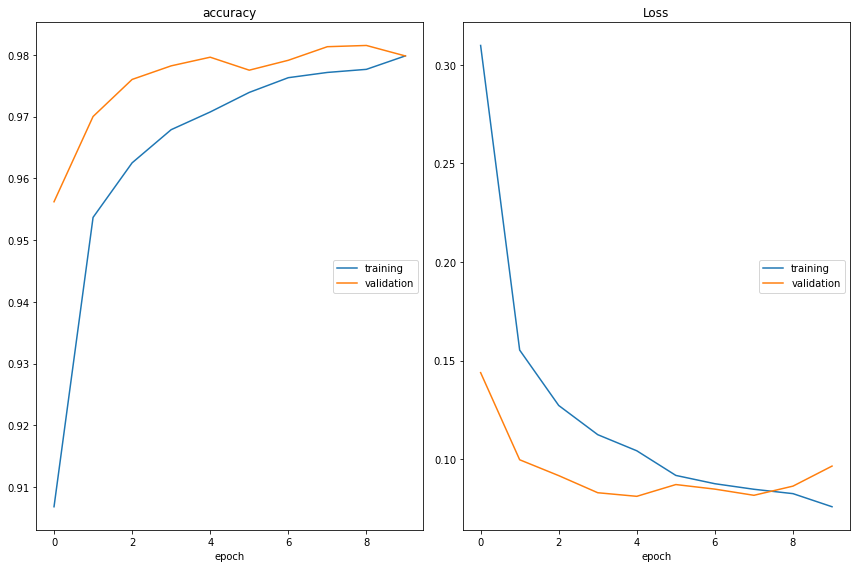

accuracy
	training         	 (min:    0.907, max:    0.980, cur:    0.980)
	validation       	 (min:    0.956, max:    0.982, cur:    0.980)
Loss
	training         	 (min:    0.076, max:    0.310, cur:    0.076)
	validation       	 (min:    0.081, max:    0.144, cur:    0.097)


In [37]:
#BUILD, COMPILE AND TRAIN THE MODEL
#Build
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_height*input_width,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(out_classes, activation='softmax'))

#Compile
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Train
model.fit(X_train, y_train, batch_size= batch_size, epochs=epochs, callbacks=[plot_losses], 
          verbose=1, validation_data=(X_test, y_test ))

In [38]:
#Retrieve the summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
